# Stroke Prediction Classifier Models

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This project uses the [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data) in Kaggle to to predict whether a patient is likely to get stroke based on personal information that are used as input features such as gender, age, past diseases, smoking status and the like. This project trains and tests the following 6 models:
- Logistic Regression
- Naive Bayes
- Gaussian Discriminant Analysis (GDA)
- Support Vector Machine
- Decision Tree
- Random Forest

# Preprocessing

#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as GDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#### Reading and loading the dataset

In [2]:
file_path = './dataset/healthcare-dataset-stroke-data.csv' 
dataset = pd.read_csv(file_path)
data = dataset.copy()
data.shape

(5110, 12)

#### Cleaning the data 

In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data.shape

(5110, 12)

#### Encoding Categorical Variables

In [7]:
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le 

#### Scaling Numerical Features

In [8]:
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

#### Splitting the dataset and handling class imbalance

In [9]:
X = data.drop(columns=['id', 'stroke'])
Y = data['stroke']


# Split into train (70%), test (20%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Visualize the Data - Categorical Features

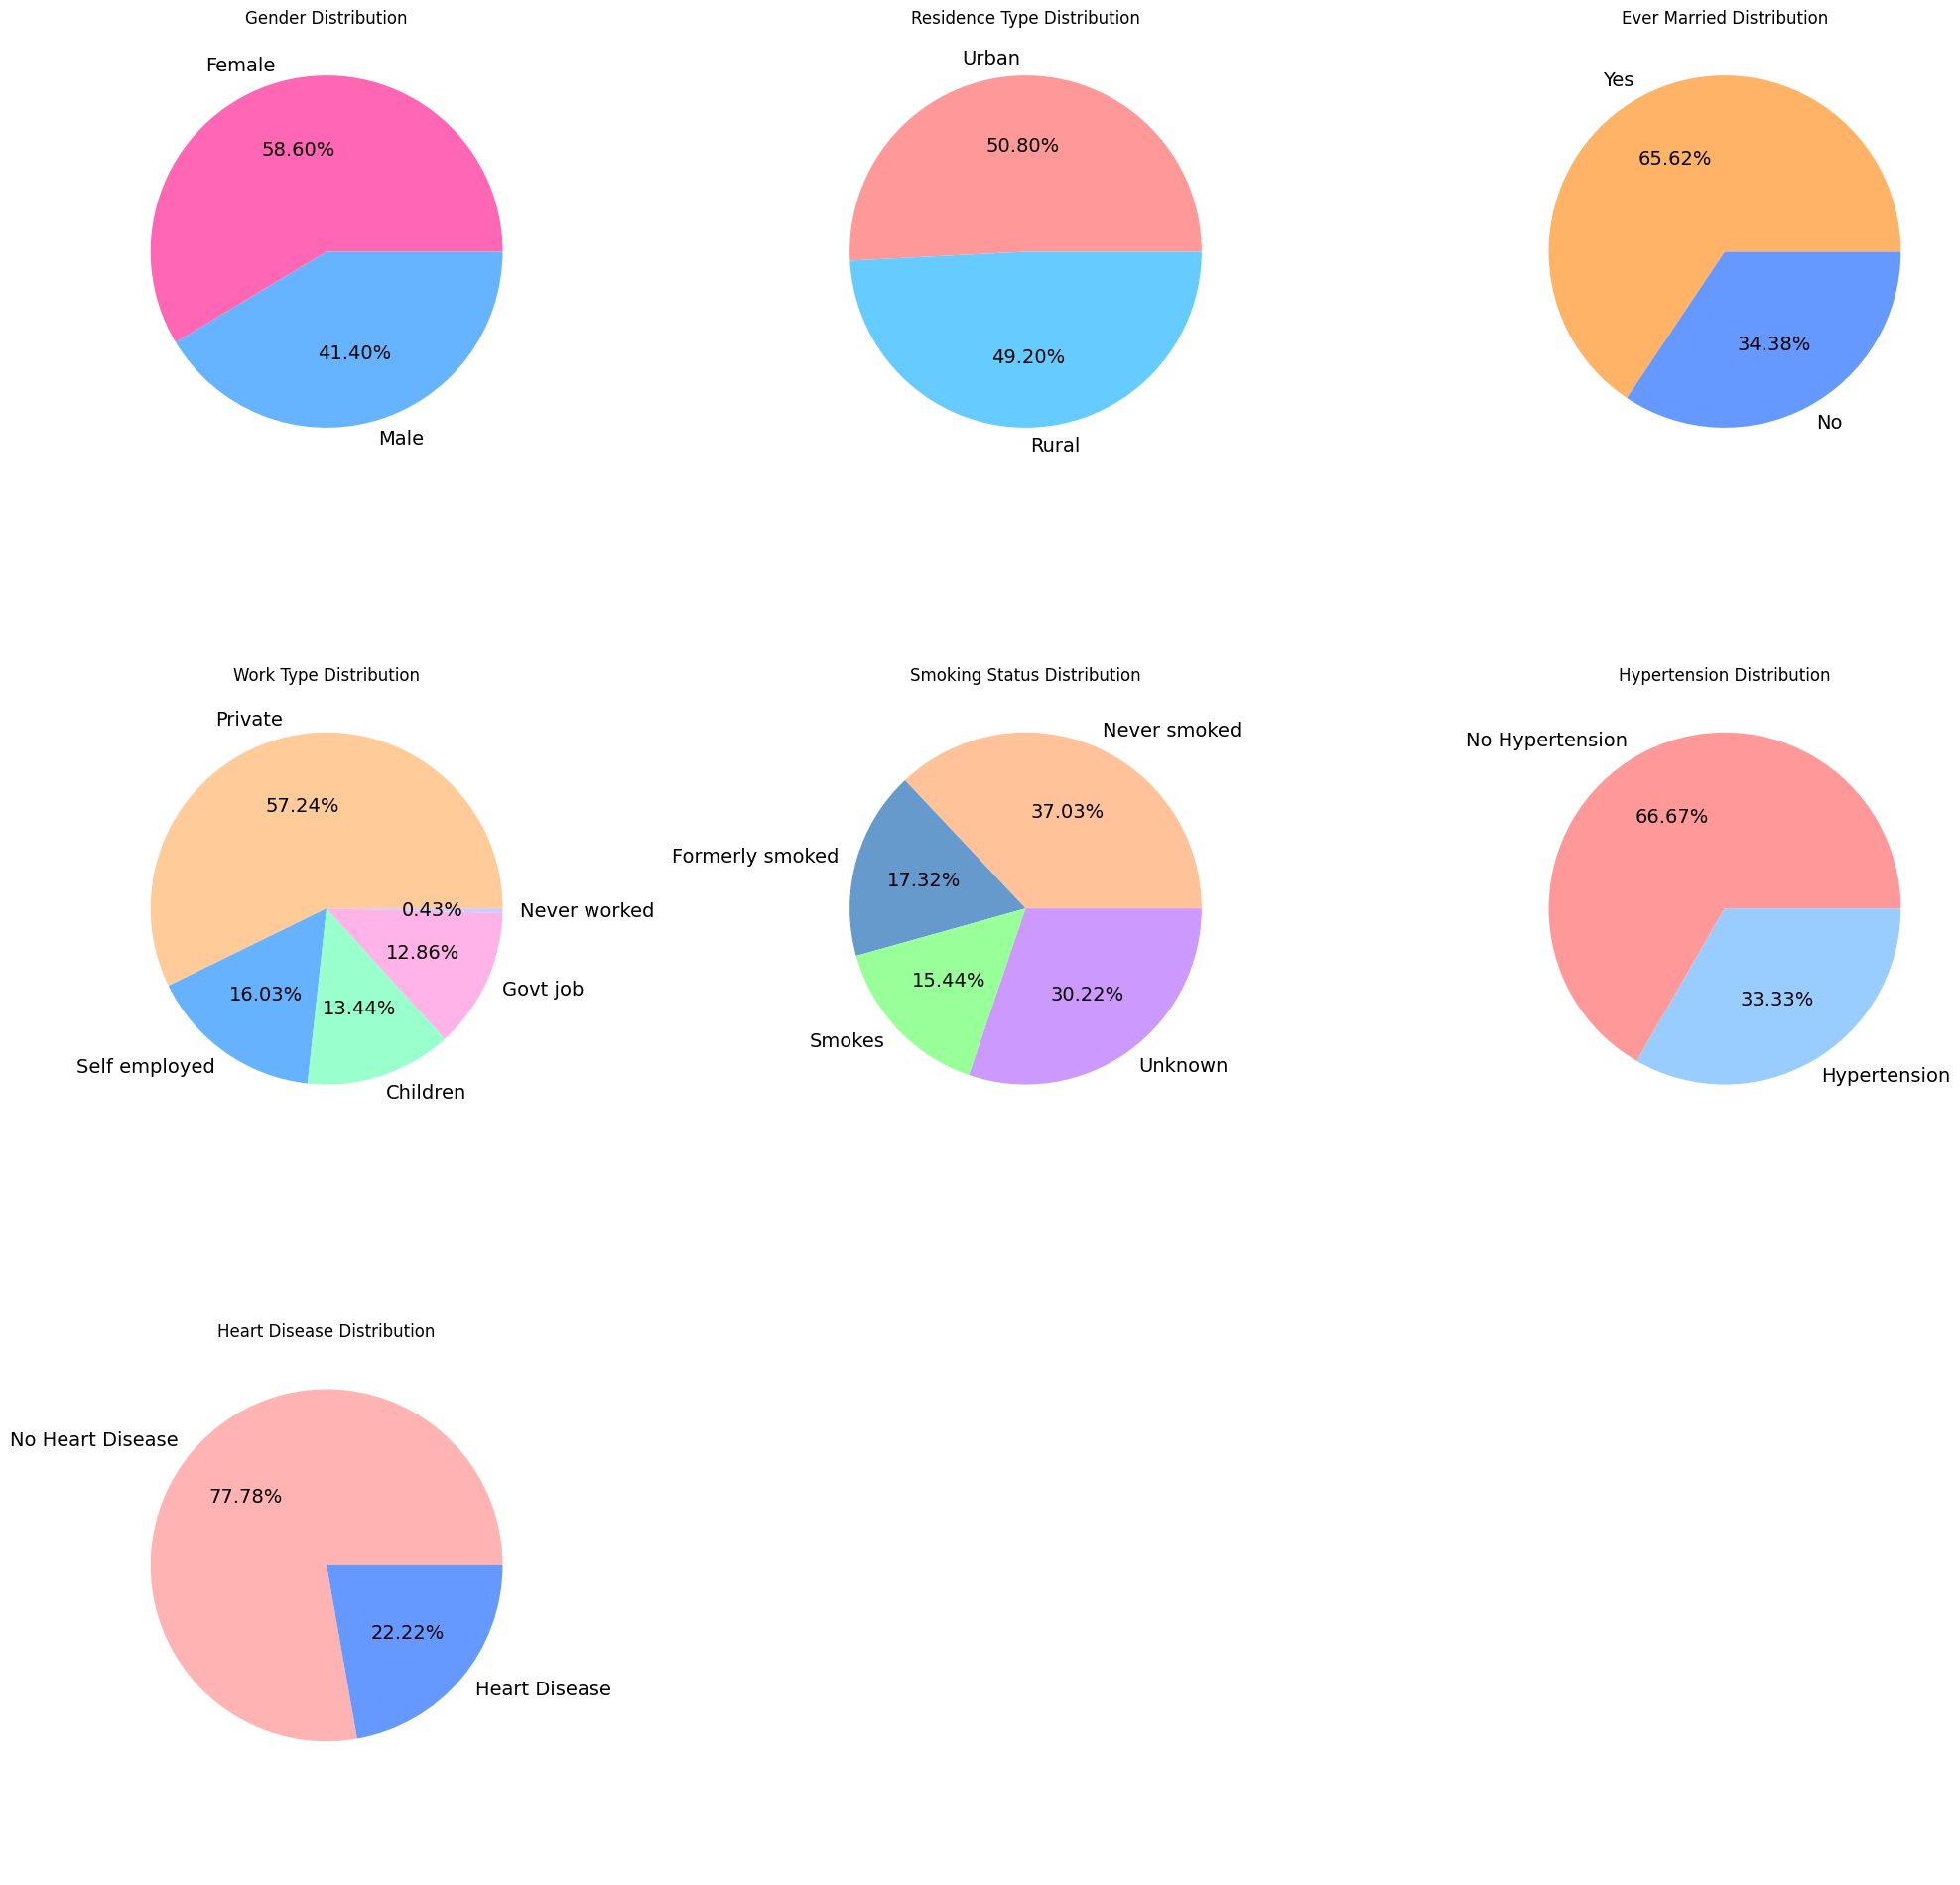

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Gender Distribution
temp_gender = [2994, 2115]
labels_gender = ['Female', 'Male']
colors_gender = ['#ff66b3', '#66b3ff']
axs[0, 0].pie(temp_gender, labels=labels_gender, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_gender)
axs[0, 0].set_title('Gender Distribution')

# Hypertension Distribution
temp_hypertension = [3000, 1500]
labels_hypertension = ['No Hypertension', 'Hypertension']
colors_hypertension = ['#ff9999', '#99ccff']
axs[1, 2].pie(temp_hypertension, labels=labels_hypertension, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_hypertension)
axs[1, 2].set_title('Hypertension Distribution')

# Heart Disease Distribution
temp_heart_disease = [3500, 1000]
labels_heart_disease = ['No Heart Disease', 'Heart Disease']
colors_heart_disease = ['#ffb3b3', '#6699ff']
axs[2, 0].pie(temp_heart_disease, labels=labels_heart_disease, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_heart_disease)
axs[2, 0].set_title('Heart Disease Distribution')

# Ever Married Distribution
temp_ever_married = [3353, 1757]
labels_ever_married = ['Yes', 'No']
colors_ever_married = ['#ffb366', '#6699ff']
axs[0, 2].pie(temp_ever_married, labels=labels_ever_married, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_ever_married)
axs[0, 2].set_title('Ever Married Distribution')

# Work Type Distribution
temp_work_type = [2925, 819, 687, 657, 22]
labels_work_type = ['Private', 'Self employed', 'Children', 'Govt job', 'Never worked']
colors_work_type = ['#ffcc99', '#66b2ff', '#99ffcc', '#ffb3e6', '#ccccff']
axs[1, 0].pie(temp_work_type, labels=labels_work_type, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_work_type)
axs[1, 0].set_title('Work Type Distribution')

# Residence Type Distribution
temp_residence = [2596, 2514]
labels_residence = ['Urban', 'Rural']
colors_residence = ['#ff9999', '#66ccff']
axs[0, 1].pie(temp_residence, labels=labels_residence, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_residence)
axs[0, 1].set_title('Residence Type Distribution')

# Smoking Status Distribution
temp_smoking_status = [1892, 885, 789, 1544]
labels_smoking_status = ['Never smoked', 'Formerly smoked', 'Smokes', 'Unknown']
colors_smoking_status = ['#ffc299', '#6699cc', '#99ff99', '#cc99ff']
axs[1, 1].pie(temp_smoking_status, labels=labels_smoking_status, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_smoking_status)
axs[1, 1].set_title('Smoking Status Distribution')

axs[2, 1].axis('off')
axs[2, 2].axis('off')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()

plt.show()

#### Visualize the Data - Numerical Features

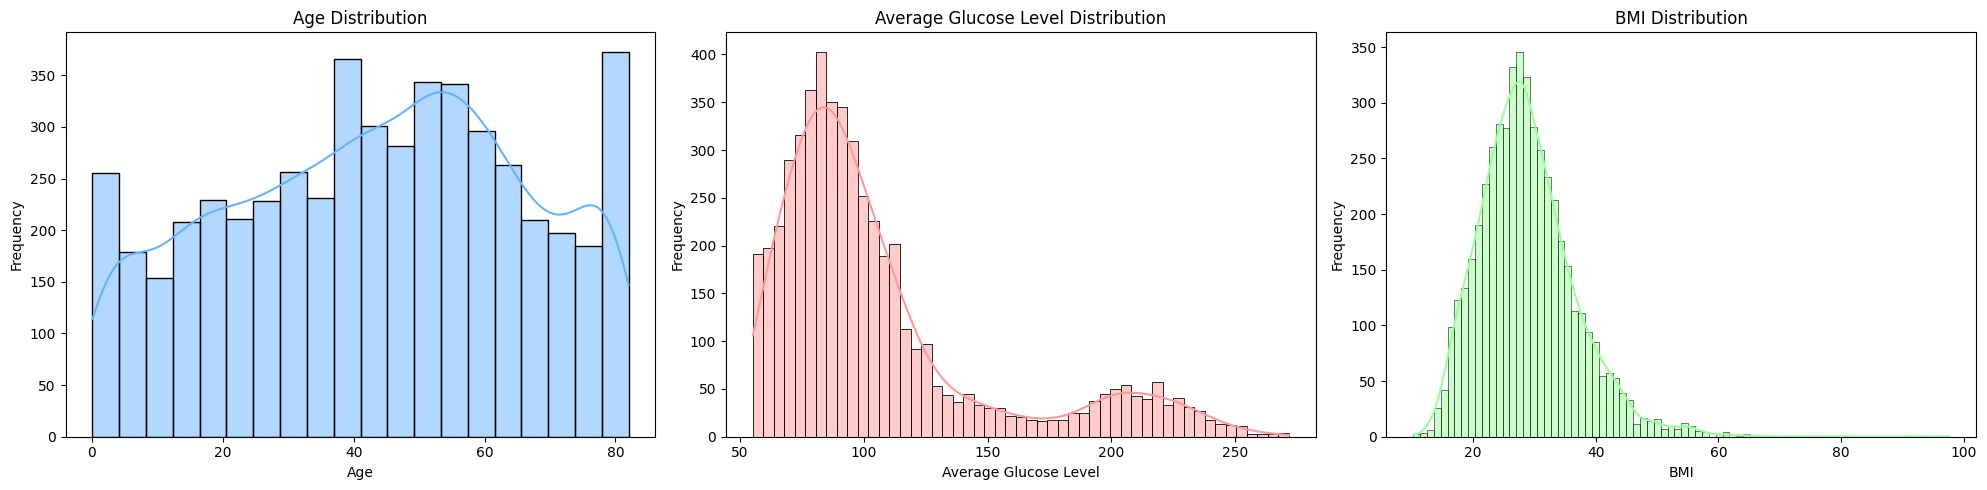

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Age Distribution
sns.histplot(dataset['age'], kde=True, color='#66b3ff', ax=axs[0])
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Average Glucose Level Distribution
sns.histplot(dataset['avg_glucose_level'], kde=True, color='#ff9999', ax=axs[1])
axs[1].set_title('Average Glucose Level Distribution')
axs[1].set_xlabel('Average Glucose Level')
axs[1].set_ylabel('Frequency')

# BMI Distribution
sns.histplot(dataset['bmi'], kde=True, color='#99ff99', ax=axs[2])
axs[2].set_title('BMI Distribution')
axs[2].set_xlabel('BMI')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Preliminary Analysis

In [12]:
colors_stroke = ["#3DD6D0", "#D7263D"]
figsize = (5, 5)

##### Gender vs Stroke

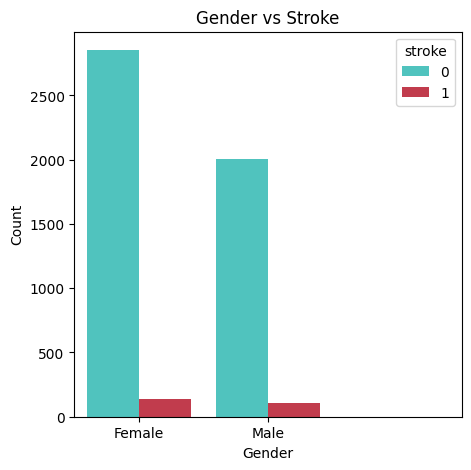

In [13]:
plt.figure(figsize=figsize)
sns.countplot(x='gender', hue='stroke', data=data, palette=colors_stroke)
plt.title('Gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], labels_gender)
plt.show()

##### Ever Married vs Stroke

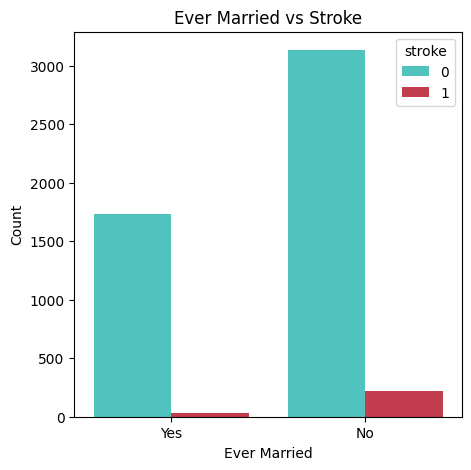

In [14]:
plt.figure(figsize=figsize)
sns.countplot(x='ever_married', hue='stroke', data=data, palette=colors_stroke)
plt.title('Ever Married vs Stroke')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.xticks([0, 1], labels_ever_married)
plt.show()

##### Work Type vs Stroke

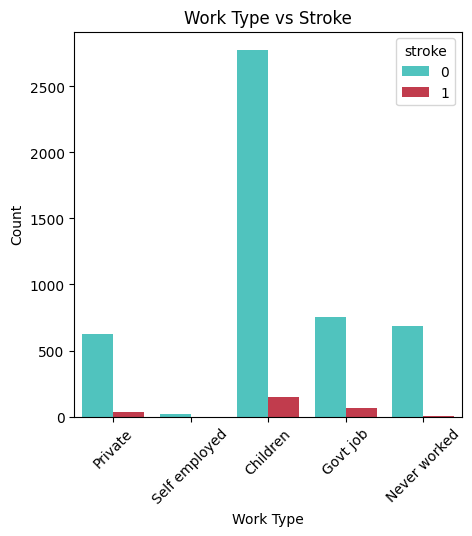

In [15]:
plt.figure(figsize=figsize)
sns.countplot(x='work_type', hue='stroke', data=data, palette=colors_stroke)
plt.title('Work Type vs Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(range(len(labels_work_type)), labels_work_type, rotation=45)
plt.show()

##### Residence Type vs Stroke

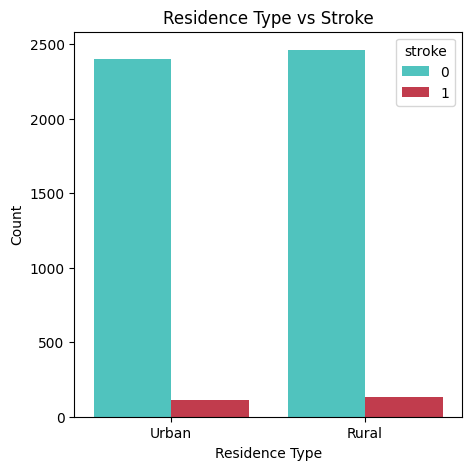

In [16]:
plt.figure(figsize=figsize)
sns.countplot(x='Residence_type', hue='stroke', data=data, palette=colors_stroke)
plt.title('Residence Type vs Stroke')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.xticks([0, 1], labels_residence)
plt.show()

##### Smoking Status vs Stroke

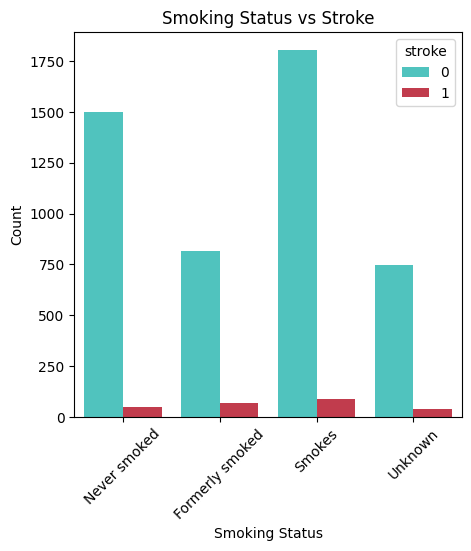

In [17]:
plt.figure(figsize=figsize)
sns.countplot(x='smoking_status', hue='stroke', data=data, palette=colors_stroke)
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(range(len(labels_smoking_status)), labels_smoking_status, rotation=45)
plt.show()

##### Hypertension vs Stroke

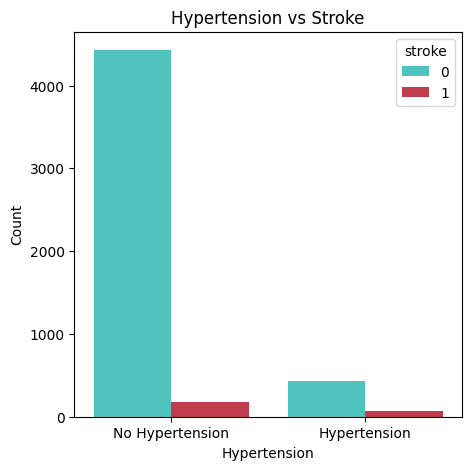

In [18]:
plt.figure(figsize=figsize)
sns.countplot(x='hypertension', hue='stroke', data=data, palette=colors_stroke)
plt.title('Hypertension vs Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks([0, 1], labels_hypertension)
plt.show()

##### Heart Disease vs Stroke

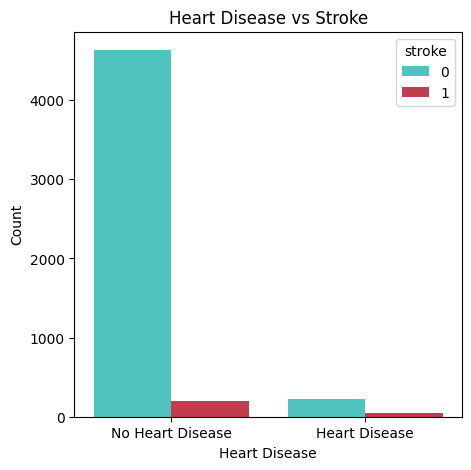

In [19]:
plt.figure(figsize=figsize)
sns.countplot(x='heart_disease', hue='stroke', data=data, palette=colors_stroke)
plt.title('Heart Disease vs Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], labels_heart_disease)
plt.show()

##### Age vs Stroke

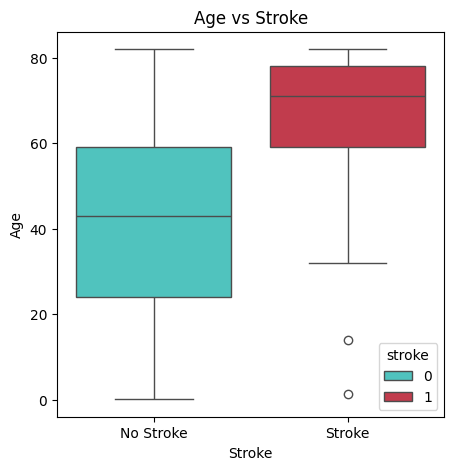

In [20]:
plt.figure(figsize=figsize)
sns.boxplot(x='stroke', y='age', data=dataset, hue="stroke", palette=colors_stroke)
plt.title('Age vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

##### Average Glucose Level vs Stroke

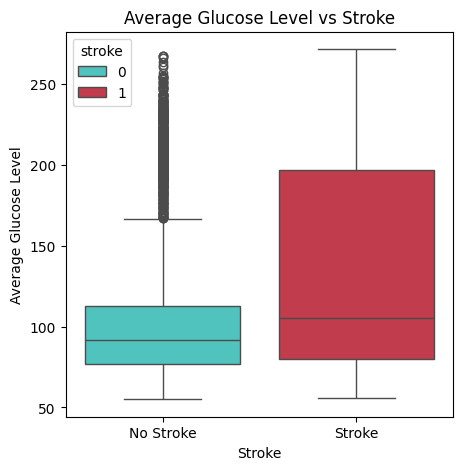

In [21]:
plt.figure(figsize=figsize)
sns.boxplot(x='stroke', y='avg_glucose_level', hue="stroke", data=dataset, palette=colors_stroke)
plt.title('Average Glucose Level vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

##### BMI vs Stroke

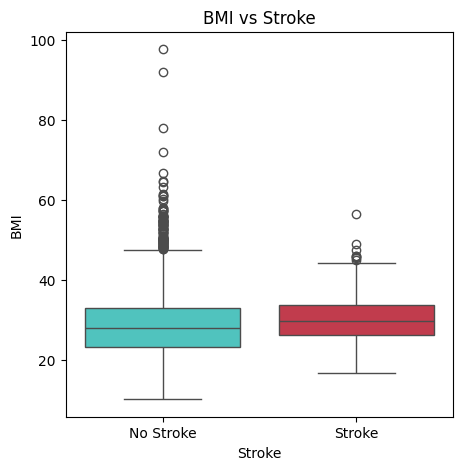

In [22]:
plt.figure(figsize=figsize)
sns.boxplot(x='stroke', y='bmi', data=dataset, hue='stroke', palette=colors_stroke, legend=False)
plt.title('BMI vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

# Training the Models

In [23]:
def evaluate_results(model_name, model, xTest, yTest):
    y_pred_test = model.predict(xTest)
    print(model_name)
    print(f"Accuracy: {accuracy_score(yTest, y_pred_test):.2f}")
    print("Classification Report:")
    print(classification_report(yTest, y_pred_test, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(yTest, y_pred_test))

### 1. Logistic Regression

In [24]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_resampled, y_resampled)

evaluate_results("Logistic Regression", lr_model, X_test, y_test)

Logistic Regression
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       977
           1       0.13      0.72      0.22        50

    accuracy                           0.75      1027
   macro avg       0.56      0.74      0.53      1027
weighted avg       0.94      0.75      0.82      1027

Confusion Matrix:
[[734 243]
 [ 14  36]]


### 2. Gaussian Discriminant Analysis GDA

In [25]:
gda_model = GDA()  
gda_model.fit(X_resampled, y_resampled) 

evaluate_results("Gaussian Discriminant Analysis (GDA)", gda_model, X_test, y_test)

Gaussian Discriminant Analysis (GDA)
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       977
           1       0.12      0.72      0.20        50

    accuracy                           0.73      1027
   macro avg       0.55      0.72      0.52      1027
weighted avg       0.94      0.73      0.80      1027

Confusion Matrix:
[[709 268]
 [ 14  36]]


### 3. Naive Bayes

In [26]:
nb_model = GaussianNB()  
nb_model.fit(X_resampled, y_resampled)  

evaluate_results("Naive Bayes", nb_model, X_test, y_test)

Naive Bayes
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       977
           1       0.11      0.76      0.19        50

    accuracy                           0.69      1027
   macro avg       0.55      0.72      0.50      1027
weighted avg       0.94      0.69      0.78      1027

Confusion Matrix:
[[672 305]
 [ 12  38]]


### 4. Support Vector Machine 

In [27]:
svm_model = SVC(random_state=42, kernel='linear', probability=True)
svm_model.fit(X_resampled, y_resampled)

evaluate_results("Support Vector Machine", svm_model, X_test, y_test)

Support Vector Machine
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       977
           1       0.13      0.76      0.22        50

    accuracy                           0.74      1027
   macro avg       0.56      0.75      0.53      1027
weighted avg       0.94      0.74      0.81      1027

Confusion Matrix:
[[719 258]
 [ 12  38]]


### 5. Decision Tree

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

evaluate_results("Decision Tree", dt_model, X_test, y_test)

Decision Tree
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       977
           1       0.10      0.24      0.14        50

    accuracy                           0.85      1027
   macro avg       0.53      0.56      0.53      1027
weighted avg       0.92      0.85      0.88      1027

Confusion Matrix:
[[863 114]
 [ 38  12]]


### 6. Random Forest

In [29]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)

evaluate_results("Random Forest", rf_model, X_test, y_test)

Random Forest
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       977
           1       0.12      0.22      0.15        50

    accuracy                           0.88      1027
   macro avg       0.54      0.57      0.54      1027
weighted avg       0.92      0.88      0.90      1027

Confusion Matrix:
[[893  84]
 [ 39  11]]


# Performance Evaluation

In [30]:
def evaluate_model(model, algorithm_name, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    results["Algorithm"].append(algorithm_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision (macro)"].append(report["macro avg"]["precision"])
    results["Recall (macro)"].append(report["macro avg"]["recall"])
    results["F1-score (macro)"].append(report["macro avg"]["f1-score"])

##### Evaluate each model and store the results and tabulate the results

In [31]:
results = {
    "Algorithm": [],
    "Accuracy": [],
    "Precision (macro)": [],
    "Recall (macro)": [],
    "F1-score (macro)": []
}

evaluate_model(lr_model, "Logistic Regression", X_test, y_test)
evaluate_model(nb_model, "Naive Bayes", X_test, y_test)
evaluate_model(gda_model, "Gaussian Discriminant Analysis(GDA)", X_test, y_test)
evaluate_model(svm_model, "Support Vector Machine", X_test, y_test)
evaluate_model(dt_model, "Decision Tree", X_test, y_test)
evaluate_model(rf_model, "Random Forest", X_test, y_test)

In [32]:
results_df = pd.DataFrame(results)
results_df

,Algorithm,Accuracy,Precision (macro),Recall (macro),F1-score (macro)
0,Logistic Regression,0.749757,0.555158,0.735640,0.534930
1,Naive Bayes,0.691334,0.546622,0.723910,0.501268
2,Gaussian Discriminant Analysis(GDA),0.725414,0.549529,0.722845,0.518754
3,Support Vector Machine,0.737098,0.555981,0.747963,0.530787
4,Decision Tree,0.851996,0.526531,0.561658,0.527713
5,Random Forest,0.880234,0.536972,0.567011,0.543646


##### Graph the results of the performance evaluation

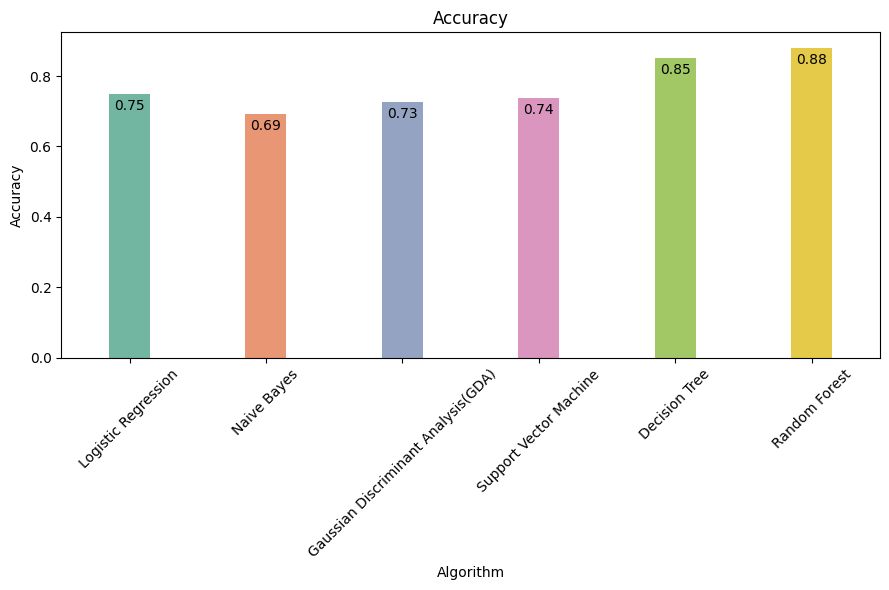

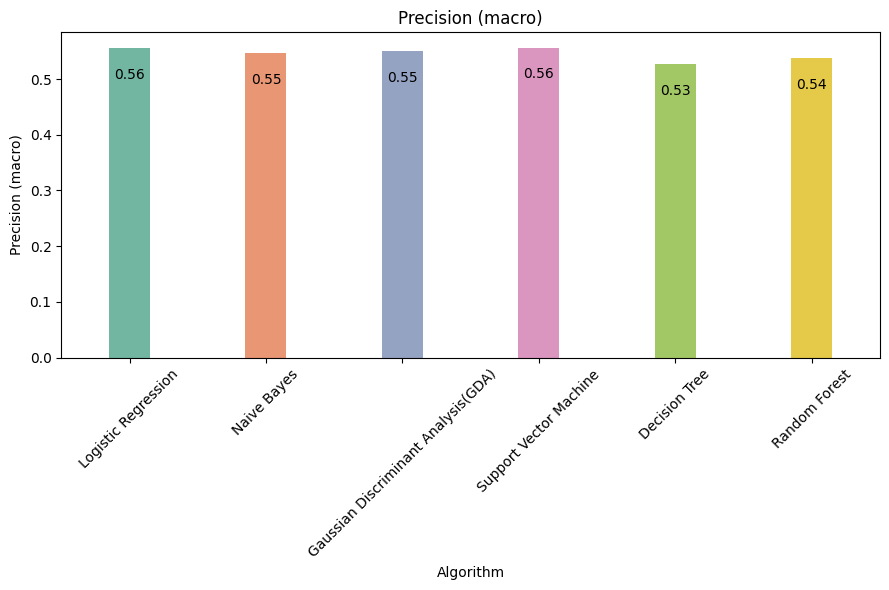

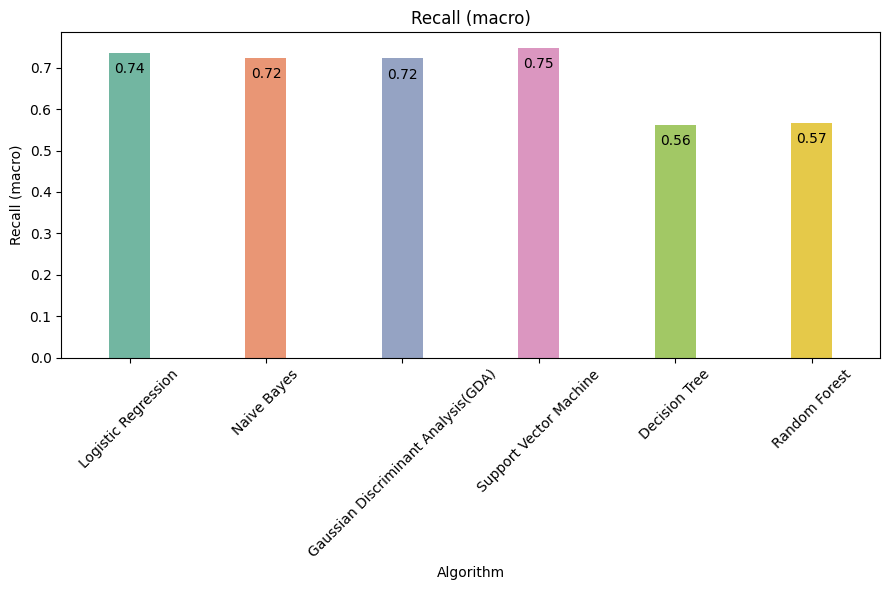

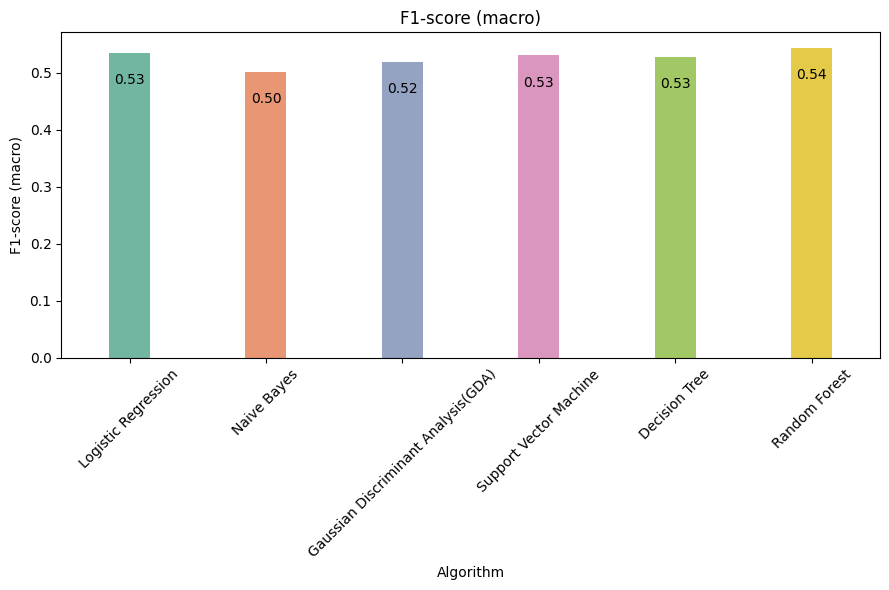

In [33]:
metrics = ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)']

for metric in metrics:
    plt.figure(figsize=(9, 6))
    ax = sns.barplot(x='Algorithm', y=metric, hue='Algorithm', data=results_df, palette='Set2', dodge=False, width=0.3)
    plt.title(f'{metric}')
    plt.xlabel('Algorithm')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height() - 0.07), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()